In [1]:
import tensorflow
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard

from time import time
from collections import Counter
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/FYP/CIFAR-10 and FMNIST/leu/'

/content/drive/MyDrive/Colab Notebooks/FYP/CIFAR-10 and FMNIST/leu


In [4]:
%ls

Im006_1.tif  Im042_1.tif  Im078_1.tif  Im114_1.tif  Im150_0.tif  Im186_0.tif  Im222_0.tif
Im007_1.tif  Im043_1.tif  Im079_1.tif  Im115_1.tif  Im151_0.tif  Im187_0.tif  Im223_0.tif
Im008_1.tif  Im044_1.tif  Im080_1.tif  Im116_1.tif  Im152_0.tif  Im188_0.tif  Im224_0.tif
Im009_1.tif  Im045_1.tif  Im081_1.tif  Im117_1.tif  Im153_0.tif  Im189_0.tif  Im225_0.tif
Im010_1.tif  Im046_1.tif  Im082_1.tif  Im118_1.tif  Im154_0.tif  Im190_0.tif  Im226_0.tif
Im011_1.tif  Im047_1.tif  Im083_1.tif  Im119_1.tif  Im155_0.tif  Im191_0.tif  Im227_0.tif
Im012_1.tif  Im048_1.tif  Im084_1.tif  Im120_1.tif  Im156_0.tif  Im192_0.tif  Im228_0.tif
Im013_1.tif  Im049_1.tif  Im085_1.tif  Im121_1.tif  Im157_0.tif  Im193_0.tif  Im229_0.tif
Im014_1.tif  Im050_1.tif  Im086_1.tif  Im122_1.tif  Im158_0.tif  Im194_0.tif  Im230_0.tif
Im015_1.tif  Im051_1.tif  Im087_1.tif  Im123_1.tif  Im159_0.tif  Im195_0.tif  Im231_0.tif
Im016_1.tif  Im052_1.tif  Im088_1.tif  Im124_1.tif  Im160_0.tif  Im196_0.tif  Im232_0.tif
Im017_1.ti

In [5]:
# Directory containing your .tiff files
directory = '/content/drive/MyDrive/Colab Notebooks/FYP/CIFAR-10 and FMNIST/leu/'

# Initialize an empty list to store the images
images = []
labels = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".tiff") or filename.endswith(".tif"):
      if "_0" in filename:
        labels.append(0)
      elif "_1" in filename:
        labels.append(1)
      # Read the .tiff file
      img = cv2.imread(os.path.join(directory, filename))
      # Append the image to the list
      images.append(img)

In [6]:
print(len(images))
print(labels)

250
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
dimensions = {}

for i in range(len(images)):
  if images[i].shape not in dimensions:
    dimensions[images[i].shape] = 1
  else:
    dimensions[images[i].shape] += 1

print(dimensions)

{(257, 257, 3): 240, (253, 257, 3): 2, (256, 257, 3): 1, (235, 257, 3): 1, (232, 257, 3): 1, (257, 232, 3): 1, (220, 257, 3): 1, (257, 193, 3): 1, (214, 257, 3): 1, (257, 196, 3): 1}


In [8]:
unaccepted_dimensions = ['(253, 257, 3)','(256, 257, 3)','(235, 257, 3)','(232, 257, 3)','(257, 232, 3)', '(220, 257, 3)', '(257, 193, 3)', '(214, 257, 3)','(257, 196, 3)']
unaccepted_indices = []

for i in range(len(images)):
  if str(images[i].shape) in unaccepted_dimensions:
    unaccepted_indices.append(i)

print(unaccepted_indices)

[12, 52, 68, 161, 181, 200, 214, 218, 231, 239]


In [9]:
print("Before deleting", len(images))
images_final = []
labels_final = []

for i in range(len(images)):
  if i not in unaccepted_indices:
    images_final.append(images[i])
    labels_final.append(labels[i])

print("After deleting", len(images_final))

Before deleting 250
After deleting 240


In [10]:
dimensions_new = {}

for i in range(len(images_final)):
  if images_final[i].shape not in dimensions_new:
    dimensions_new[images_final[i].shape] = 1
  else:
    dimensions_new[images_final[i].shape] += 1

print(dimensions_new)

{(257, 257, 3): 240}


In [11]:
images_final = np.array(images_final, dtype='uint8')

In [12]:
train_images = images_final.astype('float32')
train_images /= 255

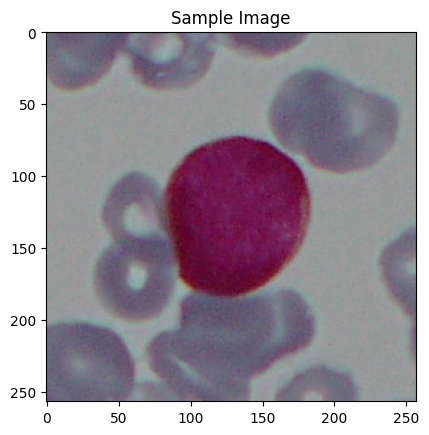

In [13]:
plt.imshow(train_images[76])
plt.title('Sample Image')
plt.show()

In [14]:
from collections import Counter
Counter(labels_final)

Counter({1: 122, 0: 118})

In [15]:
train_labels = tensorflow.keras.utils.to_categorical(labels_final, 2)

In [16]:
print("Count of training images -", len(train_images))
print("Count of training labels -", len(train_labels))

Count of training images - 240
Count of training labels - 240


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

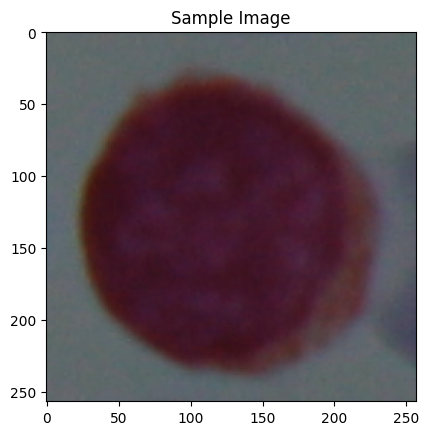

[1. 0.]


In [18]:
plt.imshow(X_train[0])
plt.title('Sample Image')
plt.show()
print(y_train[0])

In [19]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(257, 257, 3)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
# model.add(BatchNormalization())

model.add(Dense(2,activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 128)     147584    
                                                        

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cb = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [23]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    verbose=2,
                    validation_data=(X_test, y_test), callbacks=cb)

Epoch 1/200
6/6 - 27s - loss: 10.2435 - accuracy: 0.5357 - val_loss: 0.6926 - val_accuracy: 0.5833 - 27s/epoch - 5s/step
Epoch 2/200
6/6 - 3s - loss: 0.6949 - accuracy: 0.4762 - val_loss: 0.6929 - val_accuracy: 0.5833 - 3s/epoch - 435ms/step
Epoch 3/200
6/6 - 3s - loss: 0.6886 - accuracy: 0.4762 - val_loss: 0.6933 - val_accuracy: 0.4167 - 3s/epoch - 448ms/step
Epoch 4/200
6/6 - 3s - loss: 0.6912 - accuracy: 0.6190 - val_loss: 0.6937 - val_accuracy: 0.4167 - 3s/epoch - 434ms/step
Epoch 5/200
6/6 - 3s - loss: 0.6929 - accuracy: 0.5238 - val_loss: 0.6939 - val_accuracy: 0.4167 - 3s/epoch - 449ms/step
Epoch 6/200
6/6 - 3s - loss: 0.6928 - accuracy: 0.5238 - val_loss: 0.6942 - val_accuracy: 0.4167 - 3s/epoch - 448ms/step
Epoch 7/200
6/6 - 3s - loss: 0.6923 - accuracy: 0.5298 - val_loss: 0.6944 - val_accuracy: 0.4167 - 3s/epoch - 443ms/step
Epoch 8/200
6/6 - 3s - loss: 0.6853 - accuracy: 0.6667 - val_loss: 0.6869 - val_accuracy: 0.7083 - 3s/epoch - 430ms/step
Epoch 9/200
6/6 - 3s - loss: 0.6

In [24]:
print(history.history)

{'loss': [10.243494987487793, 0.6949148774147034, 0.6886426210403442, 0.6912481188774109, 0.6929498314857483, 0.6927883625030518, 0.6922820210456848, 0.6852759718894958, 0.6834805607795715, 0.6717143058776855, 0.645982563495636, 0.575515627861023, 0.5010424852371216, 0.4682351052761078, 0.4575085937976837, 0.4507577121257782, 0.45102831721305847, 0.44470301270484924, 0.44282907247543335, 0.45187699794769287, 0.431647390127182, 0.40554574131965637, 0.3509916067123413, 0.45955321192741394, 0.5176737904548645, 0.6751171946525574, 0.682266116142273, 0.65746009349823, 0.6300479769706726, 0.6068338751792908, 0.6442047953605652, 0.62834233045578, 0.5969884991645813, 0.5722289681434631, 0.5559818744659424, 0.5769498348236084, 0.6010239720344543, 0.5800132751464844, 0.5291194319725037, 0.567232072353363, 0.5216879844665527, 0.5379670262336731, 0.5023317933082581, 0.4853639602661133, 0.5045697093009949, 0.5013272762298584, 0.5403777360916138, 0.48608121275901794, 0.5359885096549988, 0.5153691768

In [25]:
best_score = max(history.history['val_accuracy'])
best_score

0.7361111044883728

In [ ]:
#Dataset - https://www.kaggle.com/datasets/nikhilsharma00/leukemia-dataset/

In [ ]:
# !pip install h5py

In [ ]:
# %ls

In [ ]:
# %cd '/content/drive/MyDrive/Colab Notebooks/FYP/CIFAR-10 and FMNIST/'

In [ ]:
%ls

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [ ]:
# %ls